In [1]:
#from thllib import flylib as flb
from matplotlib import pyplot as plt
import numpy as np
import scipy
#from thllib import util
import figurefirst as fifi
from scipy import signal

#from thllib import flylib as flb
from matplotlib import pyplot as plt
import numpy as np
import scipy
#from thllib import util
import figurefirst as fifi
import scipy.signal
import local_project_functions as lpf
from IPython.display import SVG,display
import networkx as nx


import flylib as flb
#from thllib import flylib as flb
import flylib as flb
from matplotlib import pyplot as plt
import numpy as np
import scipy
#from flb import util
import figurefirst as fifi
import scipy.signal
import local_project_functions as lpf
from IPython.display import SVG,display
import pandas as pd
import networkx as nx

from scipy.stats import norm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

/home/imager/.local/lib/python2.7/site-packages/pandas/core/computation/__init__.py:18: UserWarning: The installed version of numexpr 2.4.3 is not supported in pandas and will be not be used
The minimum supported version is 2.4.6

  ver=ver, min_ver=_MIN_NUMEXPR_VERSION), UserWarning)


In [2]:
%matplotlib inline

In [3]:
fly = flb.NetFly(1732,rootpath='/media/imager/FlyDataD/FlyDB/')
fly.open_signals()

In [4]:
#fly = flb.NetFly(1763,rootpath='/media/imager/FlyDataD/FlyDB/')
#fly.open_signals()

In [5]:
abf_sp = fly.abf_times[1] #abf spike period
ca_frame_in_abf = np.int(0.02/abf_sp) #abf period in abf idxs

#get the idx's where the ca data is aquired
ep_idx = np.where(np.array(fly.abf_led_pulse)>1.0)[0]
start = ep_idx[0]+np.int(1.5*ca_frame_in_abf) #the calcium data starts at the end of one trigger period 
stop = ep_idx[-1]+np.int(1.5*ca_frame_in_abf)


#make a time array for the recording epoch
ep_times = np.array(fly.abf_times[start:stop])
ep_times -= ep_times[0]

#load this into memory since I will use it quite a bit
spike_sig = np.array(fly.abf_electrode[start:stop])
b1_ca = fly.ca_camera_left_model_fits['b1']
## another way of extracting b1 activity
#F_ = np.mean(fly.ca_camera_left[:,24:34,75:100],axis = (1,2))
#F = np.percentile(F_,0.01)
#DF_F = (F_-F)/F
#b1_ca = DF_F

In [6]:
fly.abf_cam_trig


#get the idx's where the ca data is aquired
ep_idx = np.where(np.array(fly.abf_cam_trig)>3.0)[0]
start_1 = ep_idx[0]+np.int(1.5*ca_frame_in_abf) #the calcium data starts at the end of one trigger period 
stop_1 = ep_idx[-1]+np.int(1.5*ca_frame_in_abf)


In [7]:
print (start)
print (stop)

357571
6357548


In [8]:
print (start_1)
print (stop_1)

357572
6357541


In [9]:
###trigger measures area working

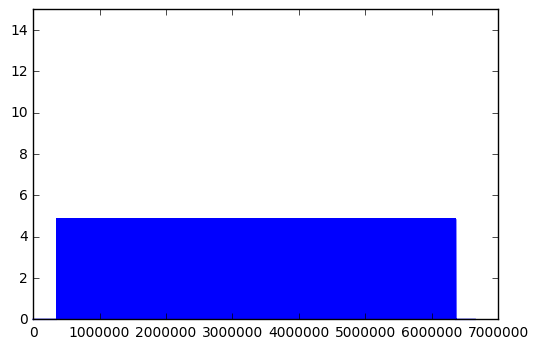

In [10]:
plt.plot(range(len(fly.abf_cam_trig)),fly.abf_cam_trig,clip_on = False)
#plt.gca().set_xbound(0,6)
plt.gca().set_ybound(0,15)
#fifi.mpl_functions.adjust_spines(plt.gca(),['left','bottom'])

In [11]:
b1_ca.shape

(7765,)

In [12]:
len(ep_times)

5999977

In [13]:
np.array(fly.ca_camera_left_times).shape

(7765,)

In [ ]:
#put the ca data into the abf timebase
#resignal.resamampled_b1_ca,resampled_t = signal.resample(b1_ca,len(ep_times),
#                                              np.array(fly.ca_camera_left_times))

In [ ]:
### now from spike signal, extract b1 phase:

In [ ]:
### load hutchens for phase info:

hutch = fly.abf_left_hutchen[start:stop]
 
fs_axon = 1.0/20000.0
 
times=np.linspace(0,len(hutch)/(1/fs_axon),len(hutch))
 
# detrend hütchens signal
hutch_det = hutch - np.mean(hutch)
 
ax1 = plt.subplot(311)
 
ax1.plot(times,hutch_det,'k')
 
#identify all relative minima
from scipy.signal import argrelmin
inds = argrelmin(hutch_det, order = 5)
ax1.plot(times[inds], hutch_det[inds], '.')
ax1.axhline(-0.08)
inds = np.array(inds)
inds = np.transpose(inds)

In [ ]:
print(inds)

/usr/lib/python2.7/dist-packages/numpy/core/numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


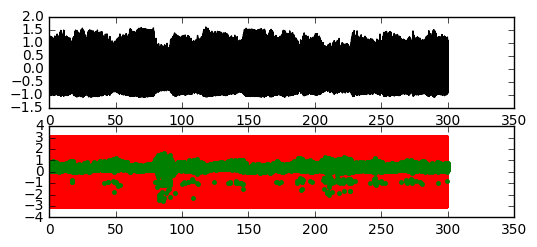

In [9]:
## identify the ventral flip of each wingbeat by applying a threshold
thresh = -.01 #adjust as needed
flipInds = []
flipInds = np.argwhere(hutch_det[inds]>thresh)
flipInds = inds[flipInds]
flipInds = flipInds[:,0]
 
#% now find the phase of the ventral flip 
 
#filter hütchen signal to make it more sinusoidal
 
from scipy import signal
from scipy.signal import butter, lfilter, freqz
 
def butter_lowpass(highcut, fs, order=4):
    nyq = 0.5 * fs
    #low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [high], btype='low', analog=False)
    return b, a
 
 
# Filter requirements.
order = 4
fs = 20000.0       # sample rate, Hz
lowcut = 100
highcut = 300.0  # desired cutoff frequency of the filter, Hz
 
# Get the filter coefficients so we can check its frequency response.
b, a = butter_lowpass(highcut, fs, order)
 
 
hutch_filt = signal.filtfilt(b, a, hutch_det)
 
ax2 = plt.subplot(312, sharex=ax1)
 
ax2.plot(times,hutch_filt,'k')
 
# perform a Hilbert transformation on the filtered signal to calculate instantaneous phase, amplitude, etc.
from scipy.signal import hilbert
 
hutch_analytic = hilbert(hutch_filt)
inst_phase = np.angle(hutch_analytic)
 
 
ax3 = plt.subplot(313, sharex=ax1)
 
# plot the identified ventral flip on the phase data
ax3.plot(times,hutch_analytic,'k')
ax3.plot(times,inst_phase,'r')
ax3.plot(times[flipInds],inst_phase[flipInds],'g.')

#%matplotlib inline 
#%pylab inline
#%matplotlib inline


import numpy as np
import scipy.signal as scs
import matplotlib.pyplot as plt
#from constrained_foopsi import *
#%matplotlib inline

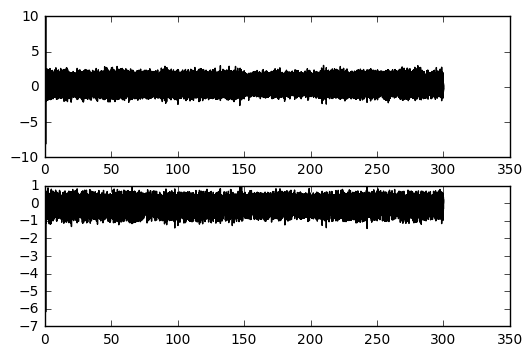

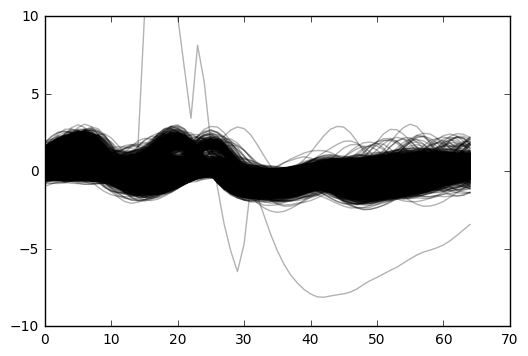

In [10]:
#detect and sort muscle spikes

from scipy.ndimage.filters import median_filter
from scipy import ndimage, misc

#%% detect muscle spikes and sort them
 
musc = fly.abf_electrode[start:stop]
#musc = np.array(musc)
 
plt.figure(2)
ax1 = plt.subplot(211)
ax1.plot(times,musc,'k')
 
#apply median filter and detrend muscle signal
 
musc_det = scipy.signal.medfilt(musc,35)
 
ax2 = plt.subplot(212, sharex = ax1)
ax2.plot(times,musc_det,'k')
 
# threshold the detrended signal (convert the spikes into binary)
# calculate the change in, identify the spike starts/stops 
#thresh = 4
thresh = 0.25 #0.6
deltas = np.diff(np.array(-1*musc_det>thresh,dtype = 'float'))
starts = np.argwhere(deltas>0.5)
stops = np.argwhere(deltas<-0.5)
if starts[0] > stops[0]:
    stops = stops[1:]
if stops[-1] < starts[-1]:
    starts = starts[:-1]
  
#find the peak changes in the thresholded signal, and find the associated waveform   
intervals = np.hstack((starts,stops))
spiketimes = [np.argmax(musc[sta:stp])+sta for sta,stp in intervals][2:-2]
waveforms = [musc[pk-25:pk+40] for pk in spiketimes]
 
#plot the collected waveforms
plt.figure(3)
for i in range(len(waveforms)):
    plt.plot(waveforms[i], 'k', alpha = 0.3)
 
wv_mtrx = np.vstack([np.array(wv) for wv in waveforms])



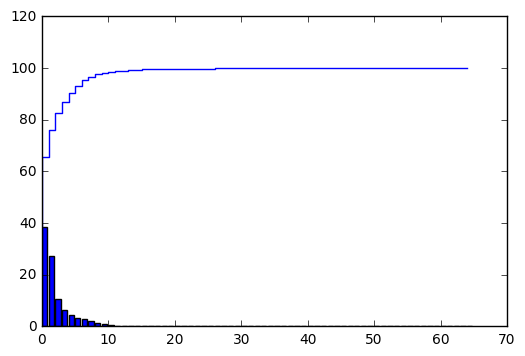

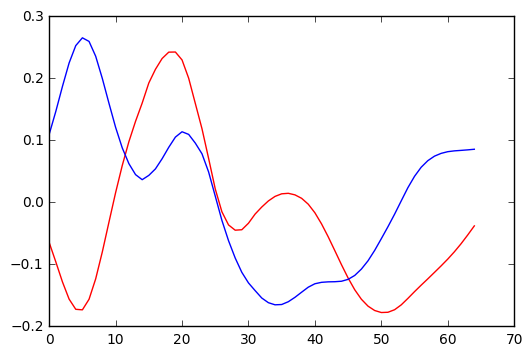

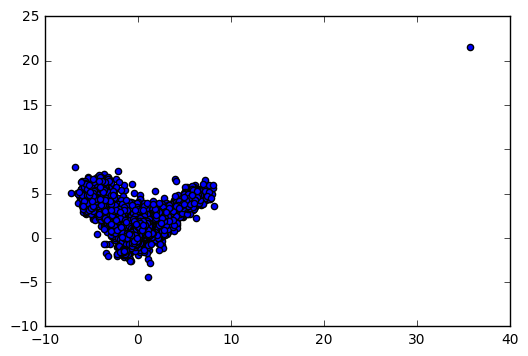

In [11]:
#%% extract the features of the waveforms to cluster the data
 
cov_wav = np.cov(wv_mtrx.T)
eig_vals, eig_vecs = np.linalg.eig(cov_wav)
#for ev in eig_vecs:
    #np.testing.assert_array_almost_equal(1.0, np.linalg.norm(ev))
 
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]
 
# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)
 
# Visually confirm that the list is correctly sorted by decreasing eigenvalues
 
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
 
plt.figure(4)
plt.bar(range(65), var_exp)
plt.step(range(65), cum_var_exp)
 
#contruct the projection matrix
matrix_w = np.hstack((eig_pairs[0][1].reshape(65,1),
                      eig_pairs[1][1].reshape(65,1)))
 
plt.figure(5)
plt.plot(matrix_w[:,0],'r')
plt.plot(matrix_w[:,1],'b')
 
plt.figure(6)
proj = []
proj1 = []
proj2 =[]
for i in range(len(wv_mtrx)):
    musc_proj = np.dot(wv_mtrx[i], matrix_w)
    proj.append(musc_proj[0])
    proj1.append(musc_proj[1])
    proj2.append(musc_proj)
    plt.scatter(musc_proj[0], musc_proj[1])
 
     
X = np.array(list(zip(proj, proj1)))
 

[[ 0.13288243  1.1699112 ]]


' \ntest3 = np.argwhere(labels=0)\n \nfor i in range(len(test3)):\n    plt.plot(wv_mtrx[test3[i]])\n'

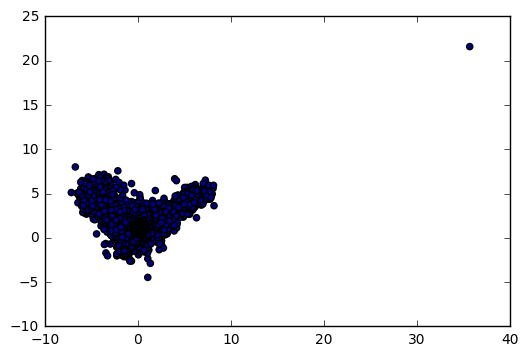

In [12]:
#%%
from sklearn.cluster import KMeans
 
# Number of clusters
#kmeans = KMeans(n_clusters=2)
#n_clusters=1
n_clusters=1
kmeans = KMeans(n_clusters=1)
# Fitting the input data
kmeans = kmeans.fit(X)
# Getting the cluster labels
labels = kmeans.predict(X)
# Centroid values
centroids = kmeans.cluster_centers_
 
#print(C) 
print(centroids)
 
plt.figure(7)
plt.scatter(X[:, 0], X[:, 1], c=labels)
 
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', s=200);
 
""" 
test3 = np.argwhere(labels=0)
 
for i in range(len(test3)):
    plt.plot(wv_mtrx[test3[i]])
"""
    

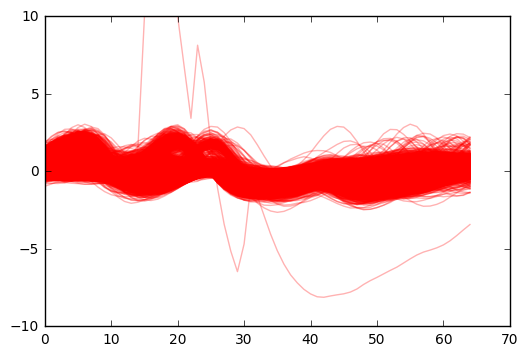

In [13]:
#%%


###### categorize and plot the labels 

labeled_spikes= zip(spiketimes,labels)


def cutoff(threshold, data):
    sortedData = sorted(data, key=lambda x: x[1])
    finalList = filter(lambda x: x[1] > threshold, sortedData)
    return finalList if len(finalList) > 2 else 'No values found'

Type_a_spikes = cutoff(0.5, labeled_spikes)

def cutoff_2(threshold, data):
    sortedData = sorted(data, key=lambda x: x[1])
    finalList = filter(lambda x: x[1] < threshold, sortedData)
    return finalList if len(finalList) > 2 else 'No values found'

Type_b_spikes = cutoff_2(0.5, labeled_spikes)



#print(zip_hutch)
#
#x_val = [x[0] for x in Type_a_spikes]
#y_val = [x[1] for x in Type_a_spikes]

x_val_b = [x[0] for x in Type_b_spikes]
y_val_b = [x[1] for x in Type_b_spikes]



#labeled_waveforms_type_a = [musc[pk-25:pk+40] for pk in x_val]

labeled_waveforms_type_b = [musc[pk-25:pk+40] for pk in x_val_b]
 
#plot the collected waveforms
#plt.figure(3)
#for i in range(len(labeled_waveforms_type_a)):
#    plt.plot(labeled_waveforms_type_a[i], 'b', alpha = 0.3)

plt.figure(3)
for i in range(len(labeled_waveforms_type_b)):
    plt.plot(labeled_waveforms_type_b[i], 'r', alpha = 0.3)
    
#go back and plot the labeled peaks
#find old code on old computer for this
#improve documentation for this



(0, 20)

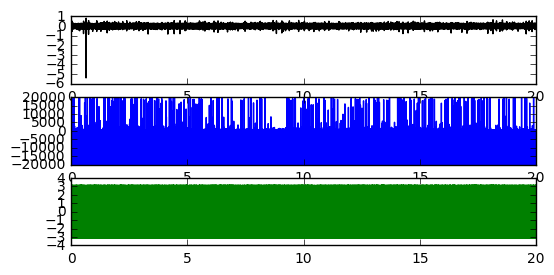

In [14]:
#%%

###Use Hilbert function againt o calculate the instantaneous freq. of B2

plt.figure(12)

# Filter requirements.
order = 4  #4  #10
fs = 20000.0       # sample rate, Hz
lowcut = 100   #100 and 200
highcut = 300.0  # desired cutoff frequency of the filter, Hz  #250



def butter_lowpass_1(highcut, fs, order=10):
    nyq = 0.5 * fs
    #low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [high], btype='low', analog=False)
    return b, a
 
 

 
# Get the filter coefficients so we can check its frequency response.
b, a = butter_lowpass_1(highcut, fs, order)
 
 
muscb2_filt = signal.filtfilt(b, a, musc_det)

#ax1 = plt.subplot(411)
#ax1.plot(times, crimson, 'r')
 
ax2 = plt.subplot(412, sharex=ax1)
 
ax2.plot(times,muscb2_filt,'k')
ax2.set_xlim(0,20)
 
# perform a Hilbert transformation on the filtered signal to calculate instantaneous phase, amplitude, etc.
from scipy.signal import hilbert
 
musc_analytic = hilbert(muscb2_filt)
inst_phase = np.angle(musc_analytic)

#instantaneous_phase = np.unwrap(np.angle(musc_analytic))
instantaneous_frequency = (np.diff(inst_phase) /(2.0*np.pi) * fs)
 
ax3 = plt.subplot(413, sharex=ax1)
 
# plot the identified ventral flip on the phase data
ax3.plot(times,musc_analytic,'k')
ax3.set_xlim(0,20)
#ax3.plot(times,inst_phase,'r')

times_freq = np.delete(times, 1568767)

ax3.plot(times_freq, instantaneous_frequency, 'b')
#ax3.plot(times[flipInds],inst_phase[flipInds],'g.')

ax4 = plt.subplot(414, sharex=ax1)
ax4.plot(times, inst_phase, 'g')
ax4.set_xlim(0,20)


In [1]:
ax4 = plt.subplot(414, sharex=ax1)
ax4.plot(times, inst_phase, 'g')
plt.gca().set_xbound(50,50.3)
plt.gca().set_ybound(-5,5)

NameError: name 'plt' is not defined

In [2]:
spikes_phase= zip(inst_phase[x_val_b], musc[x_val_b])

NameError: name 'inst_phase' is not defined

In [ ]:
ax4 = plt.subplot(414, sharex=ax1)
ax4.plot(times[x_val_b], inst_phase[x_val_b], 'g')
plt.gca().set_xbound(50,50.3)
plt.gca().set_ybound(-5,5)

In [ ]:
ax4 = plt.subplot(414, sharex=ax1)
ax4.plot(times[x_val_b], inst_phase[x_val_b], 'g')
plt.gca().set_xbound(50,60)
plt.gca().set_ybound(-5,5)

In [ ]:
ax4 = plt.subplot(414, sharex=ax1)
ax4.plot(times[x_val_b], inst_phase[x_val_b], 'g')
plt.gca().set_xbound(50,53)
plt.gca().set_ybound(-5,5)

In [ ]:
#df.phase.rolling(window=10).mean()

In [ ]:
df= pd.DataFrame()

df['phase'] = inst_phase[x_val_b]

ax4 = plt.subplot(414, sharex=ax1)
ax4.plot(times[x_val_b], inst_phase[x_val_b], 'g')
ax4.plot(times[x_val_b], df.phase.rolling(window=10).mean(), 'b')
plt.gca().set_xbound(50,53)
plt.gca().set_ybound(-5,5)

In [ ]:
df= pd.DataFrame()

df['phase'] = inst_phase[x_val_b]

ax4 = plt.subplot(414, sharex=ax1)
ax4.plot(times[x_val_b], inst_phase[x_val_b], 'g')
ax4.plot(times[x_val_b], df.phase.rolling(window=5).mean(), 'b')
plt.gca().set_xbound(50,53)
plt.gca().set_ybound(-5,5)

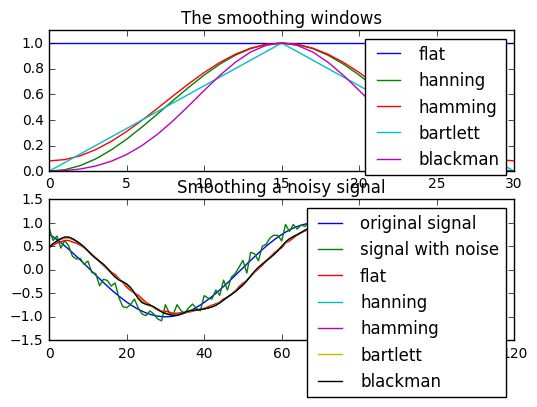

In [121]:
#from pykalman import KalmanFilter
import numpy as np
import matplotlib.pyplot as plt
import time

import numpy

def smooth_2(x,window_len=9,window='blackman'):  #11
    """smooth the data using a window with requested size.
    
    This method is based on the convolution of a scaled window with the signal.
    The signal is prepared by introducing reflected copies of the signal 
    (with the window size) in both ends so that transient parts are minimized
    in the begining and end part of the output signal.
    
    input:
        x: the input signal 
        window_len: the dimension of the smoothing window; should be an odd integer
        window: the type of window from 'flat', 'hanning', 'hamming', 'bartlett', 'blackman'
            flat window will produce a moving average smoothing.

    output:
        the smoothed signal
        
    example:

    t=linspace(-2,2,0.1)
    x=sin(t)+randn(len(t))*0.1
    y=smooth(x)
    
    see also: 
    
    numpy.hanning, numpy.hamming, numpy.bartlett, numpy.blackman, numpy.convolve
    scipy.signal.lfilter
 
    TODO: the window parameter could be the window itself if an array instead of a string
    NOTE: length(output) != length(input), to correct this: return y[(window_len/2-1):-(window_len/2)] instead of just y.
    """

    if x.ndim != 1:
        raise ValueError, "smooth only accepts 1 dimension arrays."

    if x.size < window_len:
        raise ValueError, "Input vector needs to be bigger than window size."


    if window_len<3:
        return x


    if not window in ['flat', 'hanning', 'hamming', 'bartlett', 'blackman']:
        raise ValueError, "Window is on of 'flat', 'hanning', 'hamming', 'bartlett', 'blackman'"


    s=numpy.r_[x[window_len-1:0:-1],x,x[-2:-window_len-1:-1]]
    #print(len(s))
    if window == 'flat': #moving average
        w=numpy.ones(window_len,'d')
    else:
        w=eval('numpy.'+window+'(window_len)')

    y=numpy.convolve(w/w.sum(),s,mode='valid')
    return y




from numpy import *
from pylab import *

def smooth_demo():

    t=linspace(-4,4,100)
    x=sin(t)
    xn=x+randn(len(t))*0.1
    y=smooth(x)

    ws=31

    subplot(211)
    plot(ones(ws))

    windows=['flat', 'hanning', 'hamming', 'bartlett', 'blackman']

    hold(True)
    for w in windows[1:]:
        eval('plot('+w+'(ws) )')

    axis([0,30,0,1.1])

    legend(windows)
    title("The smoothing windows")
    subplot(212)
    plot(x)
    plot(xn)
    for w in windows:
        plot(smooth(xn,10,w))
    l=['original signal', 'signal with noise']
    l.extend(windows)

    legend(l)
    title("Smoothing a noisy signal")
    show()


if __name__=='__main__':
    smooth_demo()

In [3]:
smooth_inst_phase = smooth(inst_phase[x_val_b])

ax4 = plt.subplot(414, sharex=ax1)
ax4.plot(range(len(smooth_inst_phase)), smooth_inst_phase, 'g')
plt.gca().set_xbound(50,53)
plt.gca().set_ybound(-5,5)

NameError: name 'smooth' is not defined

In [58]:
print(len(smooth_inst_phase[:-4]))
len(inst_phase[x_val_b])
len(inst_phase[x_val_b])#[:-5])

23847


23847

In [ ]:
### correlation cross correlation vs... frequency 



In [61]:
len(resampled_b1_ca)

5999977

In [ ]:
plt.plot(spike_sig*-1)
spike_sig = spike_sig*-1

In [8]:
#grab a spike pool
spike_idxs = util.idx_by_thresh(spike_sig,thresh = 2.5)
#filter out false positives here
#get_peaks
peak_idxs = [np.argmax(spike_sig[idx[0]-10:idx[-1]+10])+idx[0]-10 for idx in spike_idxs]

spike_idxs = spike_idxs[:-1]
peak_idxs = peak_idxs[:-1]

In [9]:
#from thllib import spike_sorters as spks

#wv_mtrx = np.array([spike_sig[idx-50:idx+50] for idx in peak_idxs])
time_mtrx = np.array([ep_times[idx-50:idx+50] for idx in peak_idxs])

#lns = plt.plot(wv_mtrx[::10].T)

#pool = spks.SpikePool(wv_mtrx,time_mtrx)

#p2p = spks.P2PTransform(pool,np.ones(len(pool.wv_mtrx)))

#p2p.transform()

#bns = plt.hist(p2p.trnsmtrx[:,1],bins = np.linspace(-100,100,100))

#msk = (p2p.trnsmtrx[:,1]>0)
#msk = (p2p.trnsmtrx[:,1]<20) & (p2p.trnsmtrx[:,1]>0)

#plt.subplot(1,2,1)
#plt.plot(pool.wv_mtrx[msk][::5,:].T,color = 'k', alpha = 0.2)
#plt.subplot(1,2,2)
#lns = plt.plot(pool.wv_mtrx[~msk][::5,:].T,color = 'k', alpha = 0.2)

#med_trans = spks.MedTrans(pool,msk,params = {'trans_dims':1})

#med_trans.transform()

#lns = plt.hist(med_trans.trnsmtrx[:,0],bins = 100)
#plt.gca().set_ybound(0,300)

#msk2 = med_trans.trnsmtrx[:,0]<60.

#plt.subplot(2,1,1)
#lns = plt.plot(pool.wv_mtrx[~(msk & msk2)][:,:].T,color = 'k', alpha = 0.1)
#plt.subplot(2,1,2)
#lns = plt.plot(pool.wv_mtrx[(msk & msk2)][:,:].T,color = 'r', alpha = 0.1)

#lns = plt.plot(np.array([spike_sig[idx-50:idx+50] for idx in peak_idxs[::10]]).T,color = 'k',alpha = 0.2)

#spike_idxs = np.array(spike_idxs)[msk & msk2]
#peak_idxs = np.array(peak_idxs)[msk & msk2]

In [14]:
smooth_inst_phase = smooth(inst_phase[x_val_b])
smooth_instantaneous_frequency = smooth(instantaneous_frequency)

NameError: name 'smooth' is not defined

In [67]:
def rotate_img(img, degree):
    rotated_img = ndimage.rotate(img, degree)
    return(rotated_img)

In [ ]:
##cross correaltions

In [ ]:
layout = fifi.FigureLayout('b1_phase_modulation.svg',make_mplfigures = True)

layout.axes['still_image_rec'].imshow(rotate_img(fly.ca_camera_left[200], 90), cmap='Greys_r')



layout.axes['b1_phase'].plot(times[x_val_b], inst_phase[x_val_b], color = 'b', alpha = 0.2)
layout.axes['b1_phase'].plot(times[x_val_b], inst_phase[x_val_b], color = 'b', alpha = 0.2)                                   
layout.axes['b1_phase'].plot(times[x_val_b], smooth_inst_phase[:-10], color = 'purple', alpha = 0.2) 
                                   
layout.axes['Ca_fluorescence'].plot(resampled_t, resampled_b1_ca, color = 'b', alpha = 0.6)
#layout.axes['b1_phase'].plot(times[[x_val_b], inst_phase[x_val_b], color = 'b', alpha = 0.2)                                   
#layout.axes['b1_phase'].plot(times[[x_val_b], smooth_inst_phase[:-4], color = 'purple', alpha = 0.2) 

layout.axes['kinematics'].plot(fly.abf_times[start:stop], fly.abf_kinefly_left[start:stop], color = 'b', alpha = 0.6)

layout.axes['b1_freq'].plot(times_freq, smooth_instantaneous_frequency[:-10], color ='blue', alpha = 0.6)
  

#layout.axes['time_label'].set_xlabel('time(s)')
#layout.axes['time_label'].set_zorder(-10)
fifi.mpl_functions.set_spines(layout)
layout.save('phase_vs_ca_b1_2.svg')
plt.close('all')
display(SVG('phase_vs_ca_b1_2.svg'))

In [ ]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

df = pd.read_csv('synchrony_sample.csv')
overall_pearson_r = df.corr().iloc[0,1]
print(f"Pandas computed Pearson r: {overall_pearson_r}")
# out: Pandas computed Pearson r: 0.2058774513561943

r, p = stats.pearsonr(df.dropna()['S1_Joy'], df.dropna()['S2_Joy'])
print(f"Scipy computed Pearson r: {r} and p-value: {p}")
# out: Scipy computed Pearson r: 0.20587745135619354 and p-value: 3.7902989479463397e-51

# Compute rolling window synchrony
f,ax=plt.subplots(figsize=(7,3))
df.rolling(window=30,center=True).median().plot(ax=ax)
ax.set(xlabel='Time',ylabel='Pearson r')
ax.set(title=f"Overall Pearson r = {np.round(overall_pearson_r,2)}");

In [207]:
resampled_b1_ca_2,resampled_t_2 = signal.resample(b1_ca,len(x_val_b),
                                              np.array(fly.ca_camera_left_times))
resampled_instantaneous_frequency_2,resampled_t_2 = signal.resample(instantaneous_frequency,len(x_val_b),
                                              np.array(fly.ca_camera_left_times))
resampled_lmr_2,resampled_t_2 = signal.resample(fly.abf_kinefly_left[start:stop],len(x_val_b),
                                              np.array(fly.ca_camera_left_times))

#resampled_b1_ca,resampled_t = signal.resample(b1_ca,len(ep_times),
#                                              np.array(fly.ca_camera_left_times))

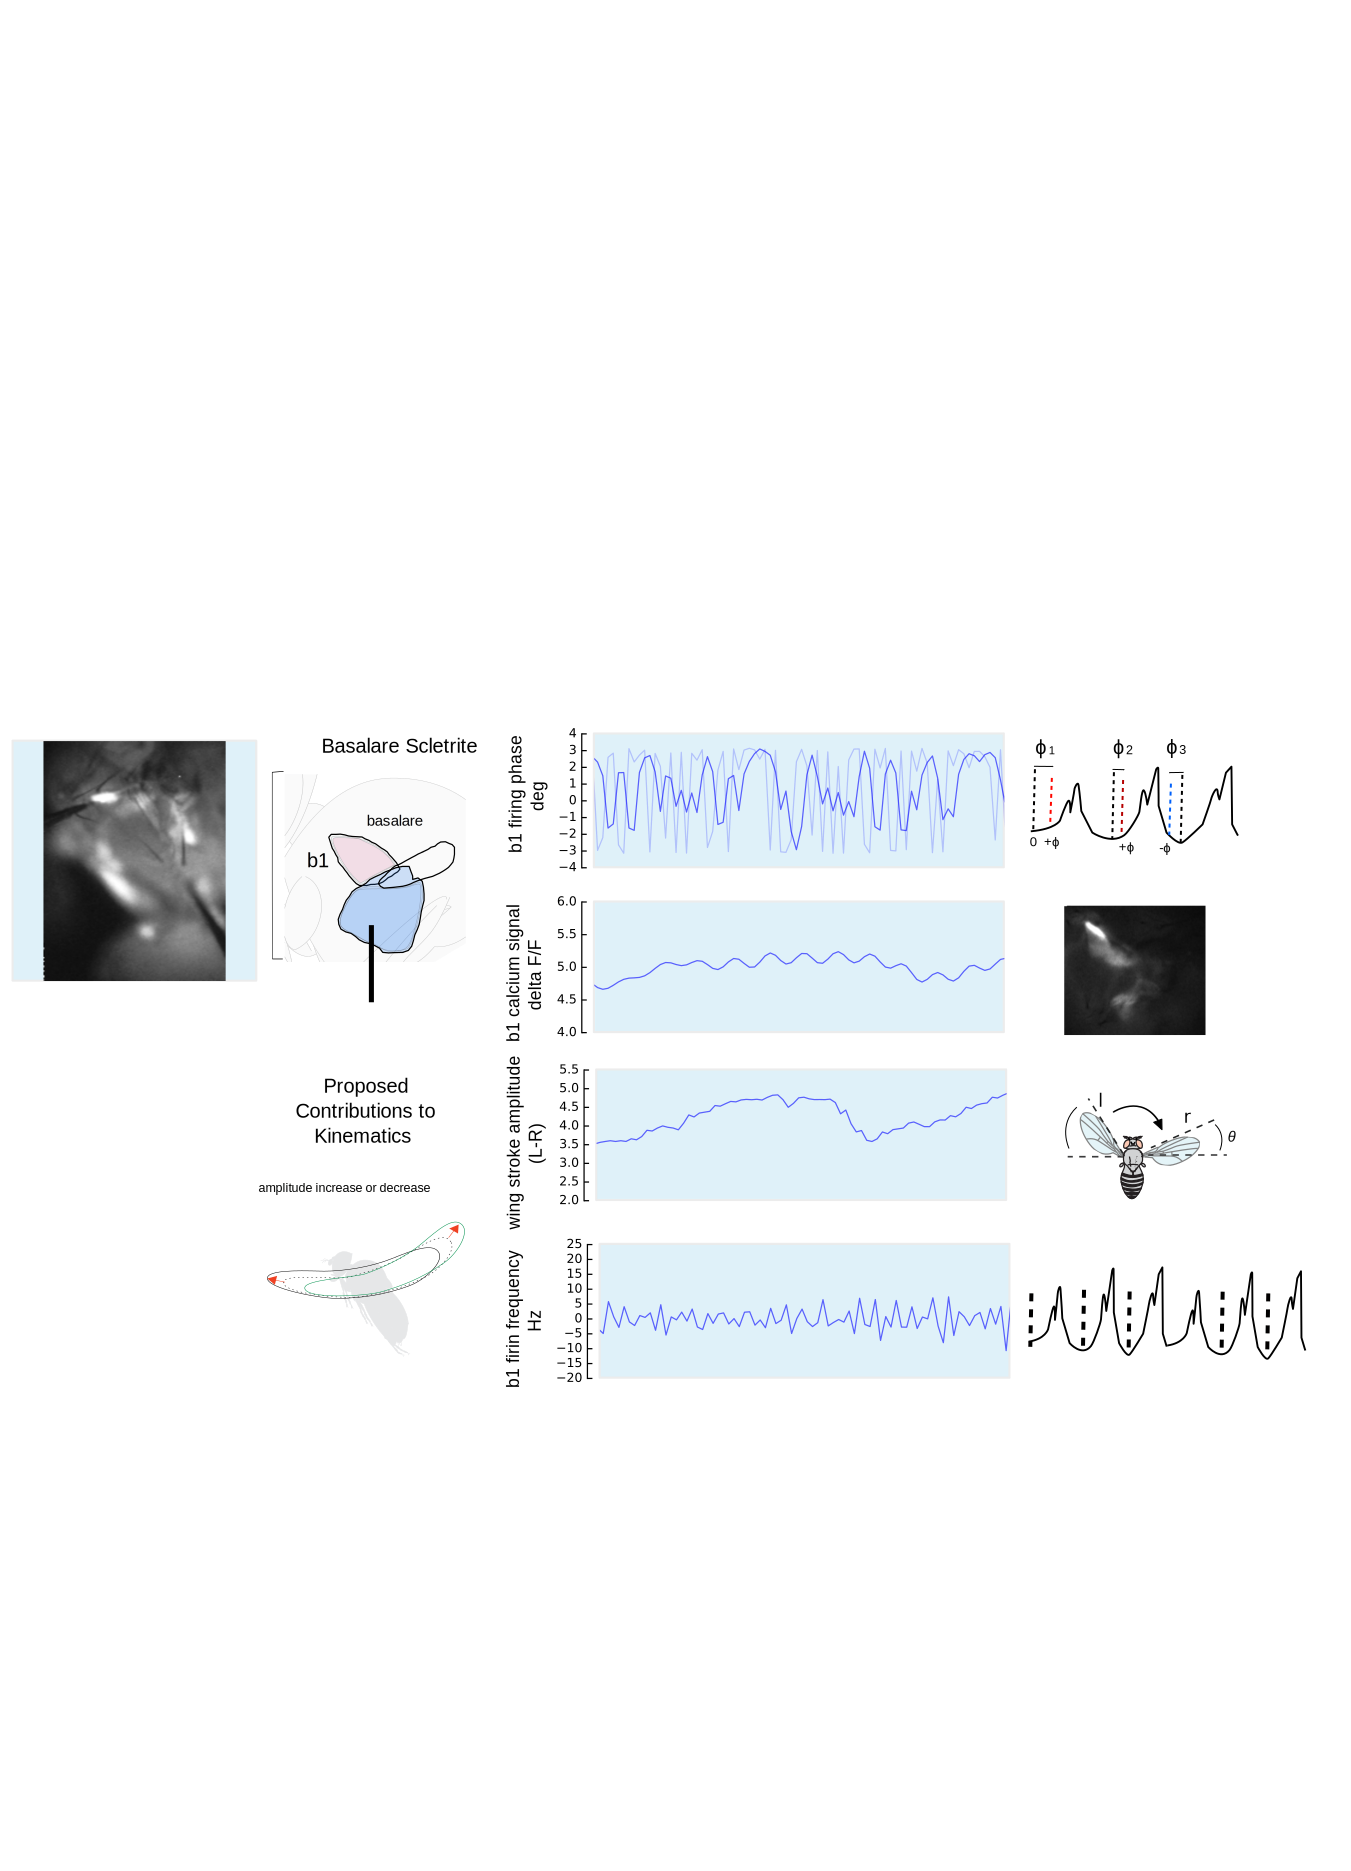

In [102]:
layout = fifi.FigureLayout('b1_phase_modulation.svg',make_mplfigures = True)

layout.axes['still_image_rec'].imshow(rotate_img(fly.ca_camera_left[200], 90), cmap='Greys_r')

open_window = 800
close_window = 1600


layout.axes['b1_phase'].plot(resampled_t_2, inst_phase[x_val_b], color = 'b', alpha = 0.2)
layout.axes['b1_phase'].plot(resampled_t_2, smooth(inst_phase[x_val_b])[:-4], color = 'b', alpha = 0.6)
layout.axes['b1_phase'].set_xbound(open_window, close_window)
layout.axes['b1_phase'].patch.set_alpha(0.0)

layout.axes['Ca_fluorescence'].plot(resampled_t_2, resampled_b1_ca_2, color = 'b', alpha = 0.6)
layout.axes['Ca_fluorescence'].set_xbound(open_window, close_window)
layout.axes['Ca_fluorescence'].patch.set_alpha(0.0)


layout.axes['kinematics'].plot(resampled_t_2, resampled_lmr_2, color = 'b', alpha = 0.6)
layout.axes['kinematics'].set_xbound(open_window, close_window)
layout.axes['kinematics'].patch.set_alpha(0.0)

layout.axes['b1_freq'].plot(resampled_t_2, resampled_instantaneous_frequency_2, color ='blue', alpha = 0.6)
layout.axes['b1_freq'].set_xbound(open_window, close_window)
layout.axes['b1_freq'].patch.set_alpha(0.0)

#layout.axes['time_label'].set_xlabel('time(s)')
#layout.axes['time_label'].set_zorder(-10)
fifi.mpl_functions.set_spines(layout)
layout.save('phase_vs_ca_b1_2.svg')
plt.close('all')
display(SVG('phase_vs_ca_b1_2.svg'))

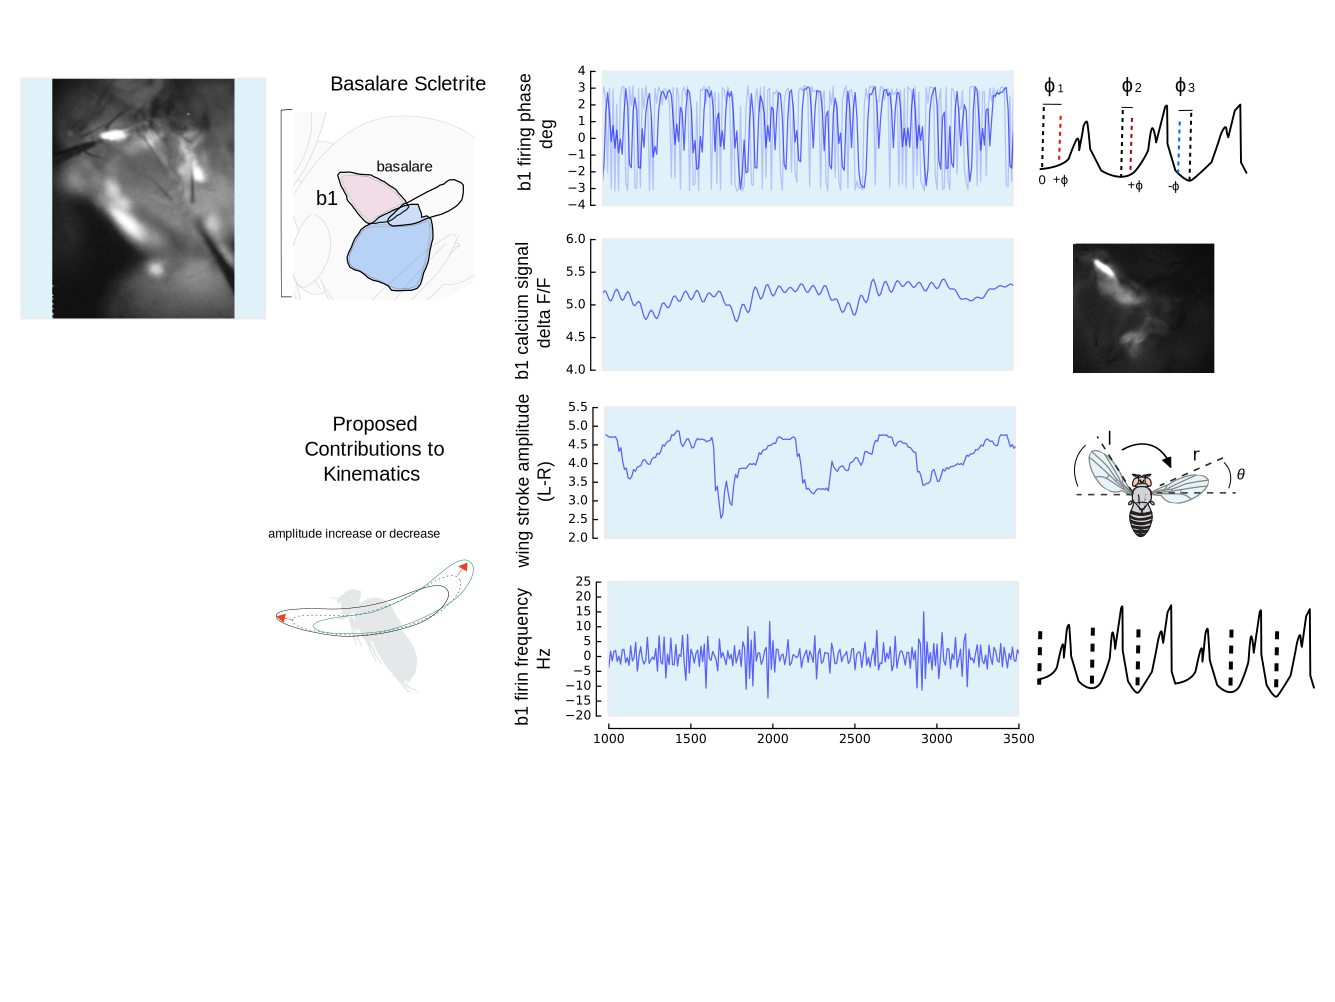

In [112]:
layout = fifi.FigureLayout('b1_phase_modulation3.svg',make_mplfigures = True)

layout.axes['still_image_rec'].imshow(rotate_img(fly.ca_camera_left[200], 90), cmap='Greys_r')

open_window = 1200
close_window = 3500


layout.axes['b1_phase'].plot(resampled_t_2, inst_phase[x_val_b], color = 'b', alpha = 0.2)
layout.axes['b1_phase'].plot(resampled_t_2, smooth(inst_phase[x_val_b])[:-4], color = 'b', alpha = 0.6)
layout.axes['b1_phase'].set_xbound(open_window, close_window)
layout.axes['b1_phase'].patch.set_alpha(0.0)

layout.axes['Ca_fluorescence'].plot(resampled_t_2, resampled_b1_ca_2, color = 'b', alpha = 0.6)
layout.axes['Ca_fluorescence'].set_xbound(open_window, close_window)
layout.axes['Ca_fluorescence'].patch.set_alpha(0.0)


layout.axes['kinematics'].plot(resampled_t_2, resampled_lmr_2, color = 'b', alpha = 0.6)
layout.axes['kinematics'].set_xbound(open_window, close_window)
layout.axes['kinematics'].patch.set_alpha(0.0)

layout.axes['b1_freq'].plot(resampled_t_2, resampled_instantaneous_frequency_2, color ='blue', alpha = 0.6)
layout.axes['b1_freq'].set_xbound(open_window, close_window)
layout.axes['b1_freq'].patch.set_alpha(0.0)

#layout.axes['time_label'].set_xlabel('time(s)')
#layout.axes['time_label'].set_zorder(-10)
fifi.mpl_functions.set_spines(layout)
layout.save('phase_vs_ca_b1_2.svg')
plt.close('all')
display(SVG('phase_vs_ca_b1_2.svg'))

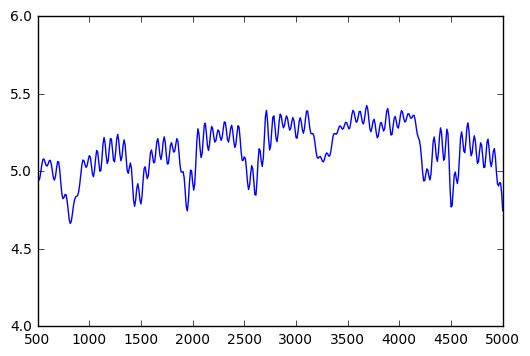

In [218]:
plt.plot(resampled_t_2, resampled_b1_ca_2)
plt.gca().set_xbound(500,5000)

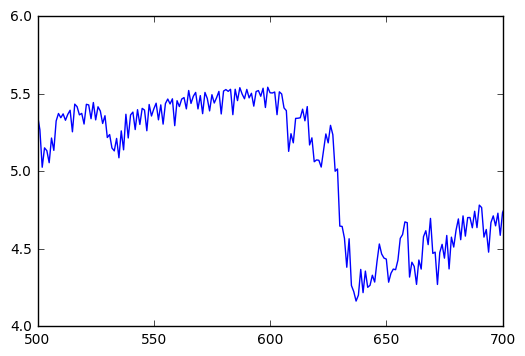

In [224]:
plt.plot(range(len(b1_ca)),b1_ca, label='AMD')
plt.gca().set_xbound(500,700)

In [ ]:
plt.plot(resampled_t_2, resampled_b1_ca_2)
plt.gca().set_xbound(500,5000)

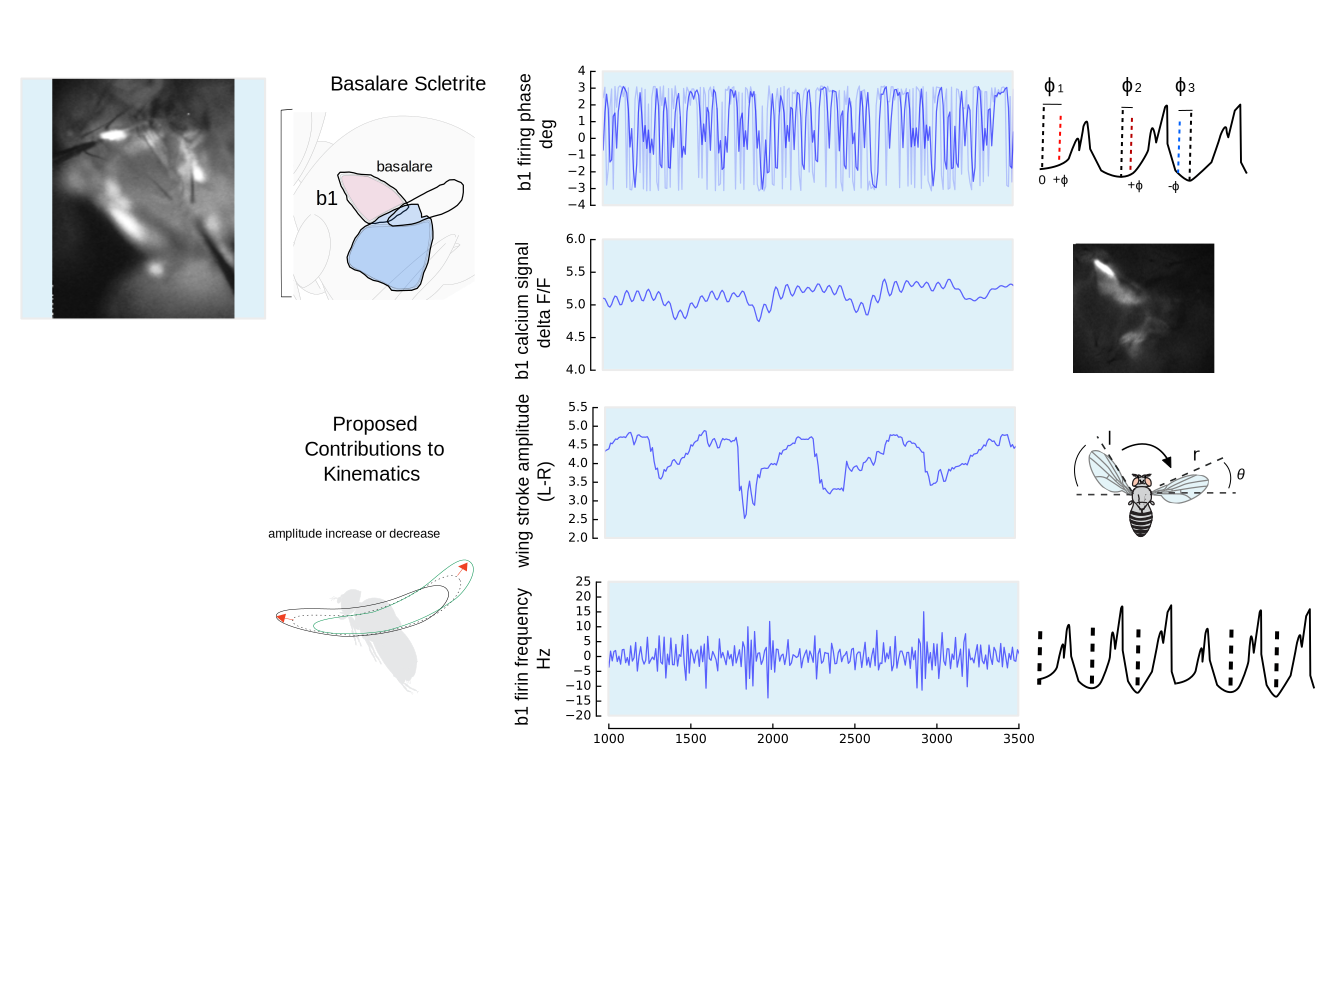

In [118]:
layout = fifi.FigureLayout('b1_phase_modulation3.svg',make_mplfigures = True)

layout.axes['still_image_rec'].imshow(rotate_img(fly.ca_camera_left[200], 90), cmap='Greys_r')

open_window = 1000
close_window = 3500


layout.axes['b1_phase'].plot(resampled_t_2, inst_phase[x_val_b], color = 'b', alpha = 0.2)
layout.axes['b1_phase'].plot(resampled_t_2, smooth(inst_phase[x_val_b])[:-4], color = 'b', alpha = 0.6)
layout.axes['b1_phase'].set_xbound(open_window, close_window)
layout.axes['b1_phase'].patch.set_alpha(0.0)

layout.axes['Ca_fluorescence'].plot(resampled_t_2, resampled_b1_ca_2, color = 'b', alpha = 0.6)
layout.axes['Ca_fluorescence'].set_xbound(open_window, close_window)
layout.axes['Ca_fluorescence'].patch.set_alpha(0.0)


layout.axes['kinematics'].plot(resampled_t_2, resampled_lmr_2, color = 'b', alpha = 0.6)
layout.axes['kinematics'].set_xbound(open_window, close_window)
layout.axes['kinematics'].patch.set_alpha(0.0)

layout.axes['b1_freq'].plot(resampled_t_2, resampled_instantaneous_frequency_2, color ='blue', alpha = 0.6)
layout.axes['b1_freq'].set_xbound(open_window, close_window)
layout.axes['b1_freq'].patch.set_alpha(0.0)

#layout.axes['time_label'].set_xlabel('time(s)')
#layout.axes['time_label'].set_zorder(-10)
fifi.mpl_functions.set_spines(layout)
layout.save('phase_vs_ca_b1_2.svg')
plt.close('all')
display(SVG('phase_vs_ca_b1_2.svg'))

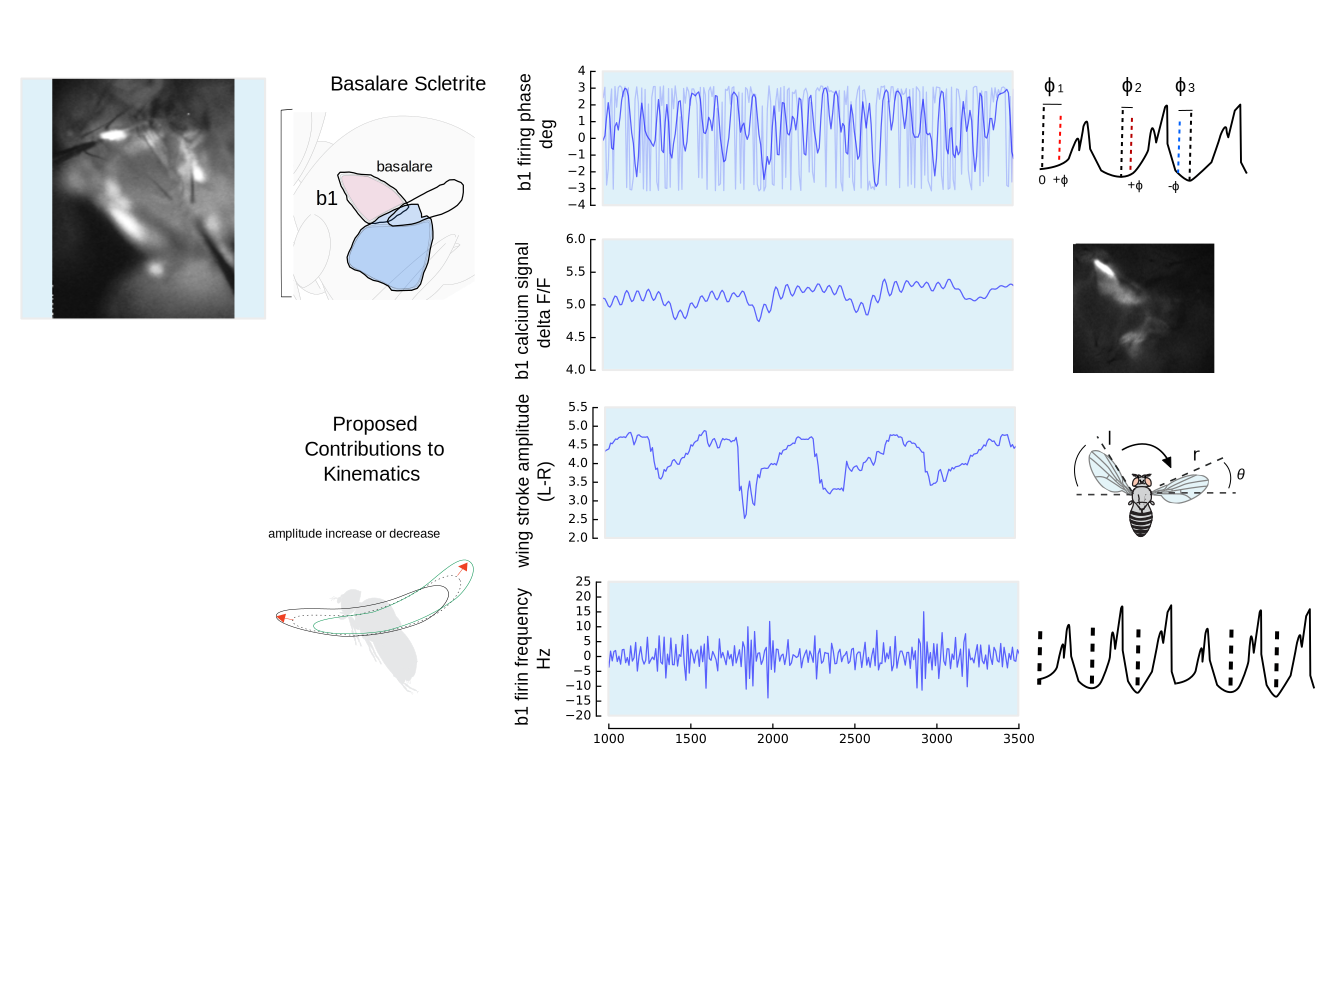

In [120]:
layout = fifi.FigureLayout('b1_phase_modulation3.svg',make_mplfigures = True)

layout.axes['still_image_rec'].imshow(rotate_img(fly.ca_camera_left[200], 90), cmap='Greys_r')

open_window = 1000
close_window = 3500


layout.axes['b1_phase'].plot(resampled_t_2, inst_phase[x_val_b], color = 'b', alpha = 0.2)
layout.axes['b1_phase'].plot(resampled_t_2, smooth_2(inst_phase[x_val_b])[:-6], color = 'b', alpha = 0.6)
layout.axes['b1_phase'].set_xbound(open_window, close_window)
layout.axes['b1_phase'].patch.set_alpha(0.0)

layout.axes['Ca_fluorescence'].plot(resampled_t_2, resampled_b1_ca_2, color = 'b', alpha = 0.6)
layout.axes['Ca_fluorescence'].set_xbound(open_window, close_window)
layout.axes['Ca_fluorescence'].patch.set_alpha(0.0)


layout.axes['kinematics'].plot(resampled_t_2, resampled_lmr_2, color = 'b', alpha = 0.6)
layout.axes['kinematics'].set_xbound(open_window, close_window)
layout.axes['kinematics'].patch.set_alpha(0.0)

layout.axes['b1_freq'].plot(resampled_t_2, resampled_instantaneous_frequency_2, color ='blue', alpha = 0.6)
layout.axes['b1_freq'].set_xbound(open_window, close_window)
layout.axes['b1_freq'].patch.set_alpha(0.0)

#layout.axes['time_label'].set_xlabel('time(s)')
#layout.axes['time_label'].set_zorder(-10)
fifi.mpl_functions.set_spines(layout)
layout.save('phase_vs_ca_b1_3.svg')
plt.close('all')
display(SVG('phase_vs_ca_b1_3.svg'))

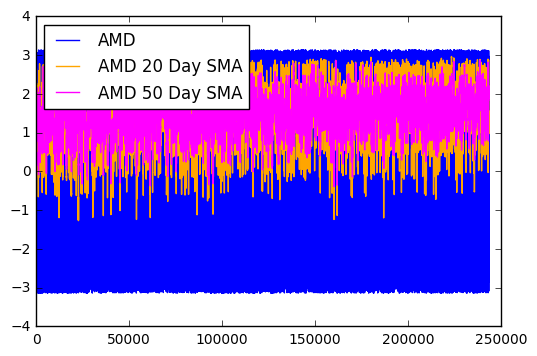

In [212]:

df= pd.DataFrame()

df['phase'] = inst_phase[x_val_b]
rolling_mean5 = df.phase.rolling(window=5).mean()
rolling_mean = df.phase.rolling(window=10).mean()
rolling_mean2 = df.phase.rolling(window=20).mean()
#plt.plot(df.ds, df.y, label='AMD')
plt.plot(resampled_t_2, inst_phase[x_val_b], label='AMD')
plt.plot(resampled_t_2, rolling_mean, label='AMD 20 Day SMA', color='orange')
plt.plot(resampled_t_2, rolling_mean2, label='AMD 50 Day SMA', color='magenta')
plt.legend(loc='upper left')
plt.show()

In [211]:
resampled_wbf,resampled_t_2 = signal.resample(fly.abf_freq[start:stop],len(x_val_b),
                                              np.array(fly.ca_camera_left_times))

resampled_right_amp,resampled_t_2 = signal.resample(fly.abf_kinefly_right[start:stop],len(x_val_b),
                                              np.array(fly.ca_camera_left_times))


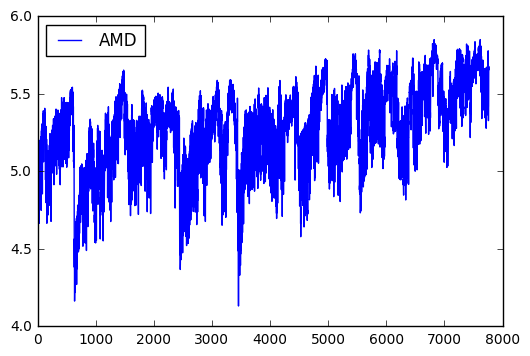

In [214]:
plt.plot(range(len(b1_ca)),b1_ca, label='AMD')
#plt.plot(resampled_t_2, rolling_mean, label='AMD 20 Day SMA', color='orange')
#plt.plot(resampled_t_2, rolling_mean2, label='AMD 50 Day SMA', color='magenta')
plt.legend(loc='upper left')
plt.ax
plt.show()

In [213]:
layout = fifi.FigureLayout('b1_phase_modulation3.svg',make_mplfigures = True)

layout.axes['still_image_rec'].imshow(rotate_img(fly.ca_camera_left[200], 90), cmap='Greys_r')

open_window = 22000
close_window = 25000


layout.axes['b1_phase'].scatter(resampled_t_2, inst_phase[x_val_b], color = 'b', alpha = 0.15)
#layout.axes['b1_phase'].plot(resampled_t_2, smooth_2(inst_phase[x_val_b])[:-8], color = 'b', alpha = 0.7)
layout.axes['b1_phase'].plot(resampled_t_2, rolling_mean5, color = 'purple', alpha = 0.7)
layout.axes['b1_phase'].plot(resampled_t_2, rolling_mean, color = 'blue', alpha = 0.7)
layout.axes['b1_phase'].set_xbound(open_window, close_window)
layout.axes['b1_phase'].patch.set_alpha(0.0)

layout.axes['Ca_fluorescence'].plot(resampled_t_2, resampled_b1_ca_2, color = 'b', alpha = 0.6)
layout.axes['Ca_fluorescence'].set_xbound(open_window, close_window)
layout.axes['Ca_fluorescence'].patch.set_alpha(0.0)


layout.axes['kinematics'].plot(resampled_t_2, resampled_lmr_2, color = 'b', alpha = 0.6)
#layout.axes['kinematics'].set_xbound(open_window, close_window)
#layout.axes['kinematics'].patch.set_alpha(0.0)
layout.axes['kinematics'].plot(resampled_t_2, resampled_right_amp, color = 'r', alpha = 0.4)
layout.axes['kinematics'].set_xbound(open_window, close_window)
layout.axes['kinematics'].patch.set_alpha(0.0)

layout.axes['b1_freq'].plot(resampled_t_2, resampled_wbf*100, color ='blue', alpha = 0.6)
layout.axes['b1_freq'].set_xbound(open_window, close_window)
layout.axes['b1_freq'].patch.set_alpha(0.0)

#layout.axes['time_label'].set_xlabel('time(s)')
#layout.axes['time_label'].set_zorder(-10)
fifi.mpl_functions.set_spines(layout)
layout.save('phase_vs_ca_b1_3.svg')
plt.close('all')
display(SVG('phase_vs_ca_b1_3.svg'))

In [ ]:
###unwrap data

### chrimson activation -- genetic lines


In [ ]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

df = pd.read_csv('synchrony_sample.csv')
overall_pearson_r = df.corr().iloc[0,1]
print(f"Pandas computed Pearson r: {overall_pearson_r}")
# out: Pandas computed Pearson r: 0.2058774513561943

r, p = stats.pearsonr(df.dropna()['S1_Joy'], df.dropna()['S2_Joy'])
print(f"Scipy computed Pearson r: {r} and p-value: {p}")
# out: Scipy computed Pearson r: 0.20587745135619354 and p-value: 3.7902989479463397e-51

# Compute rolling window synchrony
f,ax=plt.subplots(figsize=(7,3))
df.rolling(window=30,center=True).median().plot(ax=ax)
ax.set(xlabel='Time',ylabel='Pearson r')
ax.set(title=f"Overall Pearson r = {np.round(overall_pearson_r,2)}");

In [ ]:
#Pearson's correlation coefficient = covariance(X, Y) / (stdv(X) * stdv(Y))

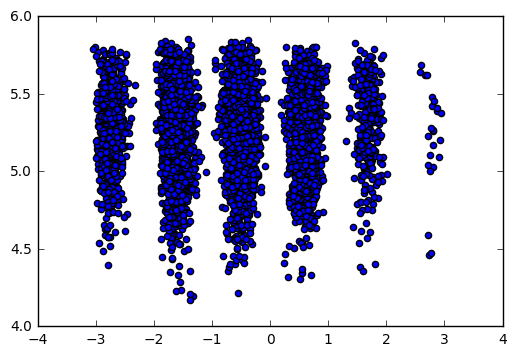

In [197]:
from numpy.random import randn
from numpy.random import seed
from scipy.stats import pearsonr

plt.scatter(rolling_mean5,resampled_b1_ca_2)

In [198]:
data1 = rolling_mean5
data2 = resampled_b1_ca_2

# calculate Pearson's correlation
corr, _ = pearsonr(data1, data2)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: nan


In [201]:
from scipy.stats import spearmanr

# calculate spearman's correlation
corr, _ = spearmanr(data1, data2)
print('Spearmans correlation: %.3f' % corr)

Spearmans correlation: -0.001


In [152]:
from numpy import cov

# calculate covariance matrix
covariance = cov(data1, data2)
print(covariance)

[[        nan         nan]
 [        nan  0.07342403]]


In [ ]:
### fix firing frequency calculation


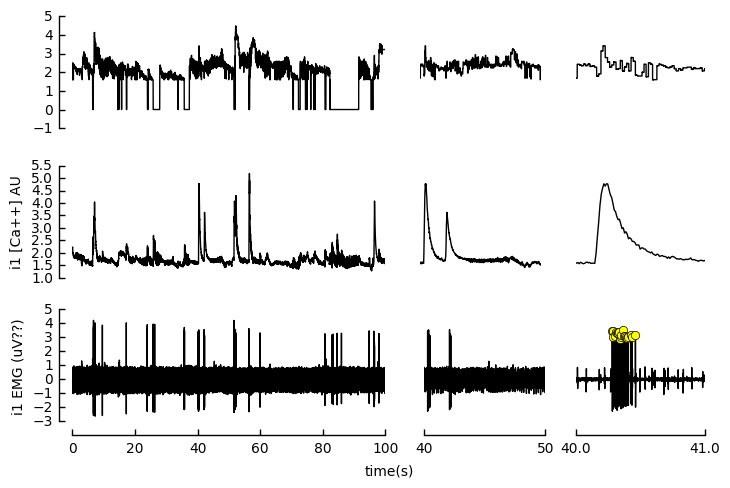

In [10]:
#inspect the data at a several time-scales
layout = fifi.FigureLayout('inspection_layout_2.svg',make_mplfigures = True)

#layout.axes['ax0'].plot(ep_times,
#                        fly.ca_camera_left_model_fits['i1'],color = 'k')
layout.axes['ax0'].plot(ep_times[::100],
                        fly.abf_kinefly_left[start:stop][::100],color = 'k')
layout.axes['ax0'].set_xbound(0,100)

layout.axes['ax1'].plot(fly.ca_camera_left_times,
                        fly.ca_camera_left_model_fits['i1'],color = 'k')

layout.axes['ax1'].set_xbound(0,100)
layout.axes['ax1'].set_ylabel('i1 [Ca++] AU')
layout.axes['ax2'].plot(ep_times,spike_sig,color = 'k')
layout.axes['ax2'].set_xbound(0,100)
#layout.axes['ax2'].set_ylabel('b1 EMG (%s)'%fly.abf_electrode_units[0])
layout.axes['ax2'].set_ylabel('i1 EMG (%s)'%'uV??')
#WE SHOULD FIGURE OUT WHAT THE UNITS ARE AND ADD IT TO THE AXON PROTOCOL


layout.axes['ax0_inset'].plot(ep_times[::100],
                        fly.abf_kinefly_left[start:stop][::100],color = 'k')
layout.axes['ax0_inset'].set_xbound(40,50)
layout.axes['ax1_inset'].plot(fly.ca_camera_left_times,
                              fly.ca_camera_left_model_fits['i1'],color = 'k')
layout.axes['ax1_inset'].set_xbound(40,50)
layout.axes['ax1_inset'].set_xticks([40,50])

layout.axes['ax2_inset'].plot(ep_times,
                              spike_sig,color = 'k')
layout.axes['ax2_inset'].set_xbound(40,50)
layout.axes['ax2_inset'].set_xticks([40,50])

layout.axes['ax0_inset2'].plot(ep_times,
                        fly.abf_kinefly_left[start:stop],color = 'k')
layout.axes['ax0_inset2'].set_xbound(40,42.0)
layout.axes['ax1_inset2'].plot(fly.ca_camera_left_times,
                               fly.ca_camera_left_model_fits['i1'],color = 'k')
layout.axes['ax1_inset2'].set_xbound(40,42.0)

layout.axes['ax2_inset2'].plot(ep_times,spike_sig,color = 'k')
layout.axes['ax2_inset2'].plot(ep_times[peak_idxs],
                               spike_sig[peak_idxs],'o',color = 'yellow')

layout.axes['ax2_inset2'].set_xbound(40.0,41.0)
layout.axes['ax2_inset2'].set_xticks([40.0,41.0])
layout.axes['ax2_inset2'].set_xticklabels(['40.0','41.0'])

layout.axes['time_label'].set_xlabel('time(s)')
layout.axes['time_label'].set_zorder(-10)
fifi.mpl_functions.set_spines(layout)
layout.save('spikes_vs_ca.svg')

In [198]:
#create an impulse train to represent the spikes
impulses = np.zeros_like(spike_sig)
impulses[peak_idxs] = 1

In [203]:
kernel = np.real(np.fft.ifft(np.fft.fft(resampled_i1_ca)/np.fft.fft(impulses)))

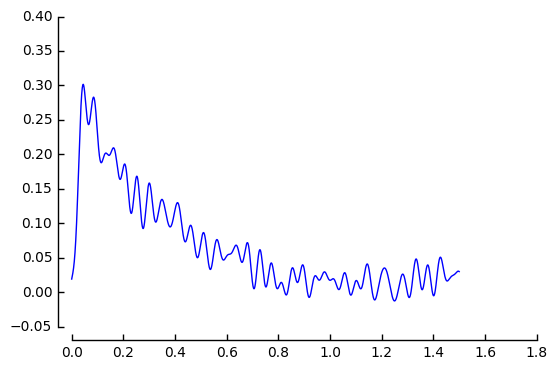

In [204]:
plt.plot(ep_times[:30000],kernel[:30000],clip_on = False)
#plt.gca().set_xbound(0,6)
#plt.gca().set_ybound(0,1)
fifi.mpl_functions.adjust_spines(plt.gca(),['left','bottom'])

In [205]:
def make_single_kernel(times,tauon1,tauoff1):
    kx = np.copy(times)
    kon1 = lambda x:np.exp(((-1*tauon1)/(x)))
    koff1 = lambda x:np.exp((-1*x)/tauoff1)
    k1 = (kon1(kx)*koff1(kx))
    return k1/np.max(k1)

def make_double_kernel(times,tauon1,tauon2,tauoff1,tauoff2):
    kx = np.copy(times)
    kon1 = lambda x:np.exp(((-1*tauon1)/(x)))
    kon2 = lambda x:np.exp(((-1*tauon2)/(x)))
    koff1 = lambda x:np.exp((-1*x)/tauoff1)
    koff2 = lambda x:np.exp((-1*x)/tauoff2)
    k1 = (kon1(kx)*koff1(kx))
    k2 = (kon2(kx)*koff2(kx))
    return (k1+k2)/np.max(k1+k2)

/home/imager/.local/lib/python2.7/site-packages/ipykernel/__main__.py:10: RuntimeWarning: divide by zero encountered in divide
/home/imager/.local/lib/python2.7/site-packages/ipykernel/__main__.py:11: RuntimeWarning: divide by zero encountered in divide


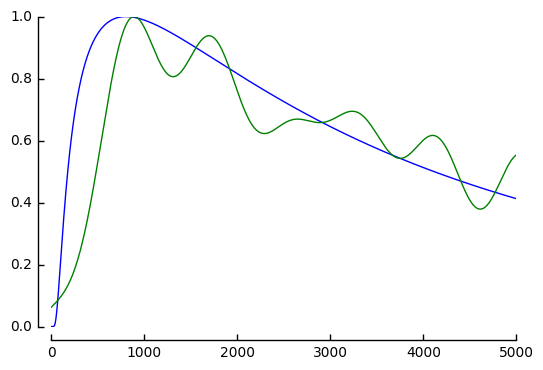

In [206]:
sp = 20. #sample period ms
MK_TON1 = 10/1000. #ms
MK_TON2 = 10/1000. #ms
MK_TOFF1 = 100/1000. #ms
MK_TOFF2 = 300/1000.
plt.plot(make_double_kernel(ep_times[:5000],MK_TON1,MK_TON2,MK_TOFF1,MK_TOFF2))
#plt.plot(make_kernel(ep_times[:60000],MK_TON1,MK_TOFF1))
plt.plot(kernel[:5000]/np.max(kernel[:5000]))
fifi.mpl_functions.adjust_spines(plt.gca(),['left','bottom'])

In [207]:
#just fit to the first segment of the curve
short_kernel = kernel[:60000]/np.max(kernel[:60000])
from scipy.optimize import curve_fit
popt1,pcov1 = curve_fit(make_single_kernel,
                      ep_times[:60000],
                      short_kernel,
                      [MK_TON1,MK_TOFF1])

popt2,pcov2 = curve_fit(make_double_kernel,
                      ep_times[:60000],
                      short_kernel,
                      [MK_TON1,MK_TON2,MK_TOFF1,MK_TOFF2])

/home/imager/.local/lib/python2.7/site-packages/ipykernel/__main__.py:3: RuntimeWarning: divide by zero encountered in divide
  app.launch_new_instance()
/home/imager/.local/lib/python2.7/site-packages/ipykernel/__main__.py:10: RuntimeWarning: divide by zero encountered in divide
/home/imager/.local/lib/python2.7/site-packages/ipykernel/__main__.py:11: RuntimeWarning: divide by zero encountered in divide
/home/imager/.local/lib/python2.7/site-packages/ipykernel/__main__.py:16: RuntimeWarning: invalid value encountered in divide


In [210]:
fit_kernel_single = make_single_kernel(ep_times,*popt1) 
fit_kernel_double = make_double_kernel(ep_times,*popt2) 

/home/imager/.local/lib/python2.7/site-packages/ipykernel/__main__.py:3: RuntimeWarning: divide by zero encountered in divide
  app.launch_new_instance()
/home/imager/.local/lib/python2.7/site-packages/ipykernel/__main__.py:10: RuntimeWarning: divide by zero encountered in divide
/home/imager/.local/lib/python2.7/site-packages/ipykernel/__main__.py:11: RuntimeWarning: divide by zero encountered in divide


In [211]:
#a negative TAU2 cant be correct, but ~300ms for
#gcamp looks good. Perhaps TAU2 should be constrained to a 
#positive number or dropped from the fit.
print popt1
print popt2

[ 0.01636028  0.23604393]
[ 0.02378957  0.02100743  0.06061984  0.30985862]


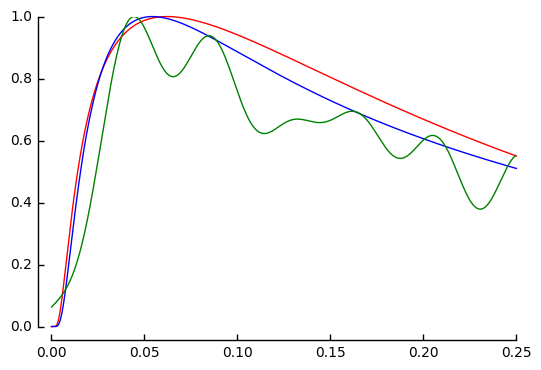

In [212]:
plt.plot(ep_times[:5000],fit_kernel_single[:5000],color = 'red',clip_on = False)
plt.plot(ep_times[:5000],fit_kernel_double[:5000],color = 'blue',clip_on = False)
plt.plot(ep_times[:5000],short_kernel[:5000]/np.max(short_kernel),color = 'green')
fifi.mpl_functions.adjust_spines(plt.gca(),['left','bottom'])

In [ ]:
snum = 4
l = fly.block_data['left', 'amp', 'cl_blocks, g_x=-1, g_y=0 b_x=0, b_y=0'][snum]
r = fly.block_data['right', 'amp', 'cl_blocks, g_x=-1, g_y=0 b_x=0, b_y=0'][snum]
x = fly.block_data['common', 'x_pos', 'cl_blocks, g_x=-1, g_y=0 b_x=0, b_y=0'][snum]

idxs = fly.block_data['common','idx', 'cl_blocks, g_x=-1, g_y=0 b_x=0, b_y=0'][snum]
times = np.arange(len(x))*0.02
sig = fly.ca_cam_left_model_fits['iii3'][idxs[]